# ESERCITAZIONE MATPLOTLIB
Esercizi non riusciti:
*   Es.12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5302,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5303,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5304,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto
5305,VEN,Moderna,5,2021-11-11,ITH,ITH3,5,Veneto


Es.1

In [ ]:
df['area'].count()


5307

Es.2

In [ ]:
Regione=input()
df.loc[df['nome_area']==Regione,'area'].count()

Calabria


175

Es.3

In [ ]:
Regione=input()
if df.loc[df['nome_area']==Regione,'area'].count() >= 1:
  print(df.loc[df['nome_area']==Regione,'area'].count())
else:
 print('Region not avaible')

Calabria
175


Es.4

In [ ]:
Regione=input('Inserire nome regione:')
df.loc[df['nome_area']==Regione,'numero_dosi'].count()

Inserire nome regione:Calabria


175

Es.5

In [ ]:
df.groupby('fornitore')['numero_dosi'].sum() 

fornitore
Janssen                     1846104
Moderna                    16881242
Pfizer/BioNTech            71421109
Vaxzevria (AstraZeneca)    11544594
Name: numero_dosi, dtype: int64

Es.6

In [ ]:
Regione=input('Scegliere la regione desiderata:')
data=df.groupby(['nome_area','fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)
data[data['nome_area']==Regione]

Scegliere la regione desiderata:Calabria


,nome_area,fornitore,numero_dosi,codice_regione_ISTAT
10,Calabria,Pfizer/BioNTech,2171020,882
11,Calabria,Vaxzevria (AstraZeneca),369763,1044
9,Calabria,Moderna,354571,1008
8,Calabria,Janssen,66600,216


Es.7

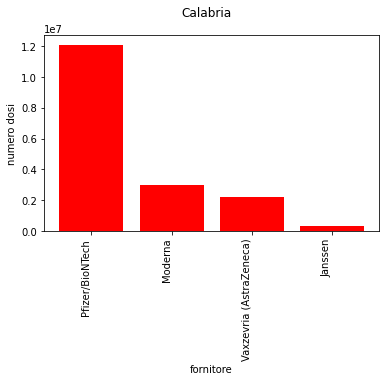

In [ ]:
fig = plt.figure()              
ax = plt.axes()     

ax.bar(data['fornitore'],data['numero_dosi'],color='Red')
fig.autofmt_xdate(rotation=90)


ax.set_xlabel('fornitore')
ax.set_ylabel('numero dosi')

fig.suptitle(Regione)
plt.show()

Es.8

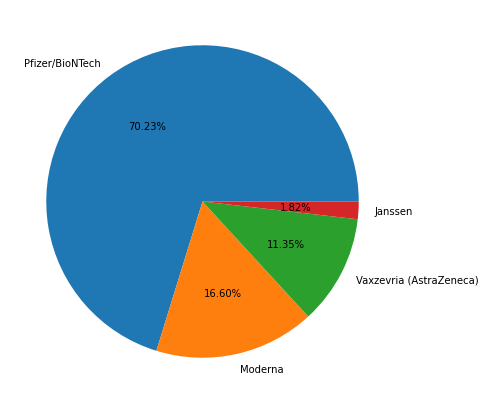

In [ ]:
data=df.groupby(['fornitore'],as_index=False).sum().sort_values('numero_dosi',ascending=False)

fig = plt.figure(figsize=[7,9])

ax = plt.axes()
ax.pie(data['numero_dosi'], labels=data['fornitore'], autopct='%1.2f%%')

plt.show()

Es.9

<function matplotlib.pyplot.show>

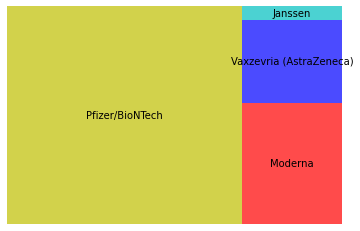

In [ ]:
!pip install squarify
import squarify

color_list=['y','r','b','c','w','r']
plt.rc('font',size=10)
squarify.plot(sizes=data['numero_dosi'],label=data['fornitore'],color=color_list,alpha=0.7)
plt.axis('off')

plt.show

Es.10

In [ ]:
df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum }).sort_values('numero_dosi',ascending=False).head(3) 

,nome_area,numero_dosi
8,Lombardia,17612089
6,Lazio,10532917
3,Campania,9179719


Es.11

In [ ]:
data=df.groupby(['nome_area'],as_index=False).agg({'numero_dosi':sum })
data.loc[data['numero_dosi'] < data['numero_dosi'].mean(),['nome_area']]

,nome_area
0,Abruzzo
1,Basilicata
2,Calabria
5,Friuli-Venezia Giulia
7,Liguria
9,Marche
10,Molise
12,Provincia Autonoma Bolzano / Bozen
13,Provincia Autonoma Trento
15,Sardegna


Es.12

In [ ]:
from dateutil.relativedelta import relativedelta
import datetime
from datetime import date, timedelta
yesterday = date.today() - timedelta(180)
yesterday

datetime.date(2021, 5, 27)

In [ ]:
dfll = df[(df['nome_area'] == 'Lombardia') | (df['nome_area'] == 'Lazio')]             #Recupero Record tra Lazio e Lombardia
dfll[dfll['data_consegna']>'2021-05-23']

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
2076,LAZ,Janssen,2,2021-05-24,ITI,ITI4,12,Lazio
2077,LAZ,Moderna,40425,2021-05-24,ITI,ITI4,12,Lazio
2078,LAZ,Pfizer/BioNTech,221,2021-05-24,ITI,ITI4,12,Lazio
2079,LAZ,Vaxzevria (AstraZeneca),32033,2021-05-24,ITI,ITI4,12,Lazio
2080,LAZ,Moderna,155,2021-05-25,ITI,ITI4,12,Lazio
...,...,...,...,...,...,...,...,...
3038,LOM,Moderna,1,2021-10-20,ITC,ITC4,3,Lombardia
3039,LOM,Pfizer/BioNTech,1,2021-10-22,ITC,ITC4,3,Lombardia
3040,LOM,Pfizer/BioNTech,1,2021-11-02,ITC,ITC4,3,Lombardia
3041,LOM,Vaxzevria (AstraZeneca),1000,2021-11-05,ITC,ITC4,3,Lombardia
